In [1]:
# [Part 1] Understanding our data

# How many records and how many parameters?
    # 1608 Records, 12 Parameters (Not counting Condition Column)

# Is this a classification or regression issue?
    # Regression. The values are continuous as opposed to 'Male' or 'Female'

# How many different classes in the data?
    # 

# How many records for each condition?
    # Normal1 has 600 records. Condition3 has 480 records. Condition 8 has 528 records.

# How many null values for each condition under each parameter?
    # Refer to cell 'Data Tally'

In [2]:
# Data Tally
import pandas as pd

path = 'Group9 - missingdata.csv' # File Name
df = pd.read_csv(path, index_col = 'Condition') # Load File

# How many records and how many parameters?
print('How many records and how many parameters?')
print('Number of Records :', len(df.index) * (len(df.columns) - 1))
print('Number of Parameters :', len(df.columns) - 1)
print('')

# How many records for each condition?
print('How many records for each condition?')
print(df.groupby(['Condition']).size() * (len(df.columns) - 1))
print('')

# How many null values for each condition under each parameter?
print('How many null values for each condition under each parameter?')

specific = df.groupby('Condition')
n1 = specific.get_group('Normal1').isna().sum()
c3 = specific.get_group('Condition3').isna().sum()
c8 = specific.get_group('Condition8').isna().sum()

dfcountnull = pd.DataFrame({"Normal 1":n1, "Condition 3":c3, "Condition 8":c8})
dfcountnull

How many records and how many parameters?
Number of Records : 1474
Number of Parameters : 11

How many records for each condition?
Condition
Condition3    440
Condition8    484
Normal1       550
dtype: int64

How many null values for each condition under each parameter?


,Normal 1,Condition 3,Condition 8
Cylinder heating zone 1,2,2,2
Cylinder heating zone 4,3,2,2
Maximum injection pressure,3,3,2
Mould temperature control unit 1,2,2,2
Cycle time,2,2,2
Cylinder heating zone 5,2,2,2
Injection time,2,2,2
Cylinder heating zone 2,2,2,2
Dosage time,2,2,2
Cylinder heating zone 3,2,2,2


In [3]:
# Data Cleaning
import pandas as pd

path = 'Group9 - missingdata.csv' # File Name
dataframe = pd.read_csv(path, index_col = 'Condition') # Load File

# Check for null on first and last row of Normal 1 and fill with appropriate method
specific = df.groupby('Condition')
n1 = specific.get_group('Normal1')

if n1.head(1).isnull().values.any() == True: # Backward fill if null is found
    n1 = n1.fillna(method='bfill')
    
if n1.tail(1).isnull().values.any() == True: # Forward fill if null is found
    n1 = n1.fillna(method='ffill')

n1 = n1.interpolate() # Interpolate if there are no null on first and last row

# Check for null on first and last row of Condition 3 and fill with appropriate method
specific = df.groupby('Condition')
c3 = specific.get_group('Condition3')

if c3.head(1).isnull().values.any() == True: # Backward fill if null is found
    c3 = c3.fillna(method='bfill')
    
if c3.tail(1).isnull().values.any() == True: # Forward fill if null is found
    c3 = c3.fillna(method='ffill')

c3 = c3.interpolate() # Interpolate if there are no null on first and last row

# Check for null on first and last row of Condition 8 and fill with appropriate method
specific = df.groupby('Condition')
c8 = specific.get_group('Condition8')

if c8.head(1).isnull().values.any() == True: # Backward fill if null is found
    c8 = c8.fillna(method='bfill')
    
if c8.tail(1).isnull().values.any() == True: # Forward fill if null is found
    c8 = c8.fillna(method='ffill')

c8 = c8.interpolate() # Interpolate if there are no null on first and last row

# Stack all clean data together
dfclean = pd.concat([n1, c3, c8])

#Save to CSV
dfclean.to_csv('Group9 - cleandata' + '.csv', index=True)

#Save to Excel
dfclean.to_excel('Group9 - cleandata' + '.xlsx', index=True)

In [4]:
# [Part 2] Statistical Analysis of cleaned data

# Calculate Mean, Median, Mode, Range and Standard Deviation of data
    # Refer to respective cell's 'Calculate Mean, Median, Mode, Range and Standard Deviation of data'

# Normalize the parameters and redo all calculations
    # Refer to cell 'Normalize and Recalculate'

# Use correlation analysis for the different parameters to find correlations and analysis result
    # Refer to cell 'Correlation Analysis'

In [5]:
# Calculate Mean, Median, Mode, Range and Standard Deviation
import pandas as pd

path2 = 'Group9 - cleandata.csv' # File Name
cleandf = pd.read_csv(path2, index_col = 'Condition') # Load File

# Variable declaration
cdfn = cleandf.filter(like = 'Normal', axis = 0)
cdf3 = cleandf.filter(like = '3', axis = 0)
cdf8 = cleandf.filter(like = '8', axis = 0)

# Create dataframe with calculated parameters for Normal 1
cdfn_data = pd.DataFrame({'N1 Mean':round(cdfn.mean(), 3), 'N1 Median':round(cdfn.median(), 3), 'N1 Range':round(cdfn.max() - cdfn.min(), 3), 'N1 Std':round(cdfn.std(), 3)})

cdfnMode = round(cdfn.mode().head(1).transpose(),3) # To get mode
cdfnMode.columns = ['N1 Mode'] # Rename column
cdfn_data = pd.concat([cdfn_data, cdfnMode], axis = 1) # Combine
cdfn_data = cdfn_data[['N1 Mean', 'N1 Median', 'N1 Mode', 'N1 Range', 'N1 Std']]

# Create dataframe with calculated parameters for Condition 3
cdf3_data = pd.DataFrame({'C3 Mean':round(cdf3.mean(), 3), 'C3 Median':round(cdf3.median(), 3), 'C3 Range':round(cdf3.max() - cdf3.min(), 3), 'C3 Std':round(cdf3.std(), 3)})

cdf3Mode = round(cdf3.mode().head(1).transpose(),3) # To get mode
cdf3Mode.columns = ['C3 Mode'] # Rename column
cdf3_data = pd.concat([cdf3_data, cdf3Mode], axis = 1) # Combine
cdf3_data = cdf3_data[['C3 Mean', 'C3 Median', 'C3 Mode', 'C3 Range', 'C3 Std']]

# Create dataframe with calculated parameters for Condition 8
cdf8_data = pd.DataFrame({'C8 Mean':round(cdf8.mean(), 3), 'C8 Median':round(cdf8.median(), 3), 'C8 Range':round(cdf8.max() - cdf8.min(), 3), 'C8 Std':round(cdf8.std(), 3)})

cdf8Mode = round(cdf8.mode().head(1).transpose(),3) # To get mode
cdf8Mode.columns = ['C8 Mode'] # Rename column
cdf8_data = pd.concat([cdf8_data, cdf8Mode], axis = 1) # Combine
cdf8_data = cdf8_data[['C8 Mean', 'C8 Median', 'C8 Mode', 'C8 Range', 'C8 Std']]

# Combine all data
cdfcom_data = pd.concat([cdfn_data, cdf3_data, cdf8_data], axis = 1)

# Sort parameters so easier to see
cdfcom_data = cdfcom_data.sort_index()

cdfcom_data

,N1 Mean,N1 Median,N1 Mode,N1 Range,N1 Std,C3 Mean,C3 Median,C3 Mode,C3 Range,C3 Std,C8 Mean,C8 Median,C8 Mode,C8 Range,C8 Std
Cycle time,28.937,28.980,28.392,2.850,0.893,28.762,28.714,27.728,2.788,0.930,28.967,28.871,27.704,2.672,0.812
Cylinder heating zone 1,278.890,278.730,266.100,27.050,8.369,281.076,281.275,286.310,26.720,7.953,280.854,280.670,266.200,26.590,7.821
Cylinder heating zone 2,295.497,295.035,294.970,29.310,8.408,295.484,295.580,284.320,26.270,8.633,294.723,293.840,280.660,28.690,9.028
Cylinder heating zone 3,307.662,307.235,294.720,30.640,9.005,307.502,305.345,300.570,28.320,8.329,308.778,307.630,307.630,30.100,9.126
Cylinder heating zone 4,311.224,313.375,294.770,29.520,7.915,309.298,309.315,311.870,29.860,8.386,314.449,315.315,294.510,30.770,8.165
Cylinder heating zone 5,316.538,319.265,302.440,31.230,9.886,320.638,321.680,323.580,23.530,7.044,314.606,314.465,299.420,30.600,8.730
Dosage time,2.944,2.941,2.866,0.328,0.084,2.864,2.866,2.698,0.340,0.092,2.862,2.875,2.816,0.322,0.086
Injection time,0.237,0.239,0.204,0.100,0.030,0.216,0.208,0.208,0.080,0.023,0.308,0.312,0.344,0.120,0.033
Material cushion,0.944,0.947,0.937,0.115,0.025,1.059,1.066,0.998,0.138,0.035,1.011,1.013,0.953,0.123,0.038
Maximum injection pressure,1534.605,1538.085,1440.630,186.110,50.186,1543.647,1551.310,1562.210,163.440,46.719,1389.435,1398.430,1311.990,164.240,43.638


In [8]:
# Normalize and Recalculate
import pandas as pd

path2 = 'Group9 - cleandata.csv' # File Name
cleandf = pd.read_csv(path2, index_col = 'Condition') # Load File

# Normalize everything first
normdf = cleandf.copy() # Copy data

for column in normdf.columns:
    normdf[column] = (normdf[column] - normdf[column].min()) / (normdf[column].max() - normdf[column].min())
    
# Calculate Mean, Median, Mode, Range and Standard Deviation
normdfn = normdf.filter(like = 'Normal', axis = 0)
normdf3 = normdf.filter(like = '3', axis = 0)
normdf8 = normdf.filter(like = '8', axis = 0)

# Create dataframe with calculated parameters for Normal 1
normdfn_data = pd.DataFrame({'N1 Mean':round(normdfn.mean(), 3), 'N1 Median':round(normdfn.median(), 3), 'N1 Range':round(normdfn.max() - normdfn.min(), 3), 'N1 Std':round(normdfn.std(), 3)})

normdfnMode = round(normdfn.mode().head(1).transpose(),3) # To get mode
normdfnMode.columns = ['N1 Mode'] # Rename column
normdfn_data = pd.concat([normdfn_data, normdfnMode], axis = 1) # Combine
normdfn_data = normdfn_data[['N1 Mean', 'N1 Median', 'N1 Mode', 'N1 Range', 'N1 Std']]

# Create dataframe with calculated parameters for Condition 3
normdf3_data = pd.DataFrame({'C3 Mean':round(normdf3.mean(), 3), 'C3 Median':round(normdf3.median(), 3), 'C3 Range':round(normdf3.max() - normdf3.min(), 3), 'C3 Std':round(normdf3.std(), 3)})

normdf3Mode = round(normdf3.mode().head(1).transpose(),3) # To get mode
normdf3Mode.columns = ['C3 Mode'] # Rename column
normdf3_data = pd.concat([normdf3_data, normdf3Mode], axis = 1) # Combine
normdf3_data = normdf3_data[['C3 Mean', 'C3 Median', 'C3 Mode', 'C3 Range', 'C3 Std']]

# Create dataframe with calculated parameters for Condition 8
normdf8_data = pd.DataFrame({'C8 Mean':round(normdf8.mean(), 3), 'C8 Median':round(normdf8.median(), 3), 'C8 Range':round(normdf8.max() - normdf8.min(), 3), 'C8 Std':round(normdf8.std(), 3)})

normdf8Mode = round(normdf8.mode().head(1).transpose(),3) # To get mode
normdf8Mode.columns = ['C8 Mode'] # Rename column
normdf8_data = pd.concat([normdf8_data, normdf8Mode], axis = 1) # Combine
normdf8_data = normdf8_data[['C8 Mean', 'C8 Median', 'C8 Mode', 'C8 Range', 'C8 Std']]

# Combine all data
normdfcom_data = pd.concat([normdfn_data, normdf3_data, normdf8_data], axis = 1)

# Sort parameters so easier to see
normdfcom_data = normdfcom_data.sort_index()

normdfcom_trans = normdfcom_data.transpose()

#Save to CSV
normdfcom_trans.to_csv('Group9 - normdata' + '.csv', index=True)

#Save to Excel
normdfcom_trans.to_excel('Group9 - normdata' + '.xlsx', index=True)

normdfcom_data

,N1 Mean,N1 Median,N1 Mode,N1 Range,N1 Std,C3 Mean,C3 Median,C3 Mode,C3 Range,C3 Std,C8 Mean,C8 Median,C8 Mode,C8 Range,C8 Std
Cycle time,0.508,0.522,0.321,0.975,0.305,0.448,0.432,0.094,0.953,0.318,0.518,0.485,0.086,0.914,0.278
Cylinder heating zone 1,0.466,0.461,0.000,0.987,0.305,0.546,0.553,0.737,0.974,0.290,0.538,0.531,0.004,0.970,0.285
Cylinder heating zone 2,0.525,0.509,0.507,1.000,0.287,0.524,0.527,0.143,0.896,0.295,0.498,0.468,0.018,0.979,0.308
Cylinder heating zone 3,0.422,0.408,0.000,1.000,0.294,0.417,0.347,0.191,0.924,0.272,0.459,0.421,0.421,0.982,0.298
Cylinder heating zone 4,0.543,0.613,0.008,0.959,0.257,0.481,0.481,0.564,0.970,0.273,0.648,0.676,0.000,1.000,0.265
Cylinder heating zone 5,0.545,0.631,0.096,0.994,0.315,0.675,0.708,0.769,0.749,0.224,0.483,0.479,0.000,0.974,0.278
Dosage time,0.573,0.565,0.391,0.763,0.194,0.385,0.391,0.000,0.791,0.215,0.382,0.412,0.274,0.749,0.201
Injection time,0.316,0.328,0.140,0.538,0.161,0.203,0.161,0.161,0.430,0.122,0.696,0.718,0.892,0.645,0.179
Material cushion,0.231,0.243,0.202,0.487,0.107,0.719,0.748,0.462,0.585,0.149,0.517,0.526,0.272,0.521,0.163
Maximum injection pressure,0.707,0.718,0.409,0.591,0.159,0.736,0.760,0.795,0.519,0.148,0.246,0.275,0.000,0.522,0.139


<AxesSubplot:>

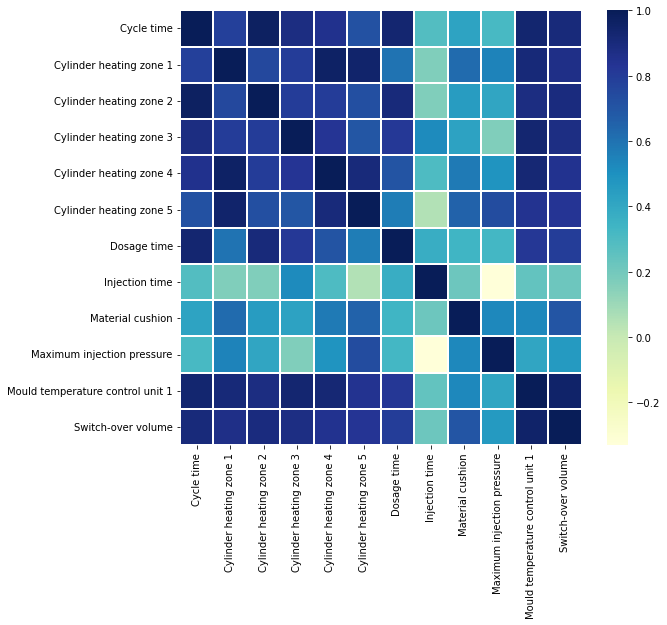

In [9]:
# Correlation Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path3 = 'Group9 - normdata.csv' # File Name
normcorr = pd.read_csv(path3) # Load File

# Plot correlation matrix
corrmat = normcorr.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)